# Using Population objects to create biased data

In [1]:
import mlsim
import pandas as pd
import numpy as np
import seaborn as sns
from collections import namedtuple

Create an all default population

In [2]:
pop = mlsim.bias.Population()

To view the details on this population, we can use the `get_parameter_description` method.

In [3]:
print(pop.get_parameter_description())

Demographic Parameters
DemParams(Pa=[0.5, 0.5], Pz_a=[[0.5, 0.5], [0.5, 0.5]])
Target Parameters 
TargetParams(Py_az=[[[0.95, 0.05], [0.95, 0.05]], [[0.95, 0.05], [0.95, 0.05]]])
Feature Parameters 
FeatureParams(distfunc=<function <lambda> at 0x7fc98a189700>, theta=[[[[5, 2], [2, 5]], [[5, 2], [2, 5]]], [[[5, 2], [2, 5]], [[5, 2], [2, 5]]]])
Feature Noise Parameters 
NoiseParams(noisefunc=<function <lambda> at 0x7fc98a18e280>, theta=[[[1.0, 1.0], [1.0, 1.0]], [[1.0, 1.0], [1.0, 1.0]]])


The instantiation just assigns values to these parameters. In order to get data, we use the `sample` method.

In [4]:
help(pop.sample)

Help on method sample in module mlsim.bias.populations:

sample(N, return_as='DataFrame') method of mlsim.bias.populations.Population instance
    sample N members of the  population, according to its underlying
    distribution
    
    Parameters
    -----------
    N : int
        number of samples
    return_as : string, 'dataframe'
        type to return as, can be pandas 'DataFrame' or IBM AIF360
        'structuredDataset'



In [5]:
pop_df1 = pop.sample(100)
pop_df1.head()

,a,z,y,x0,x1
0,0.0,1.0,1.0,2.867357,4.628609
1,0.0,0.0,0.0,5.080684,2.945964
2,0.0,1.0,1.0,2.030819,4.267798
3,0.0,0.0,0.0,5.065378,1.894033
4,1.0,0.0,0.0,4.643410,2.822794


## Changing the type of bias

Now demo some with various biases to create examples

In [6]:
# create a correlated demographic sampler
label_bias_dem = mlsim.bias.DemographicCorrelated(rho_a=.2,rho_z=[.25,.15])

# instantiate a population with that
pop_label_bias = mlsim.bias.PopulationInstantiated(demographic_sampler=label_bias_dem)

In [7]:
pop_label_bias_df1 = pop_label_bias.sample(100)
pop_label_bias_df1.head()

,a,z,y,x0,x1
0,0.0,0.0,0.0,5.300376,0.986896
1,0.0,0.0,0.0,2.687046,0.947970
2,0.0,0.0,0.0,5.972963,3.737018
3,0.0,0.0,0.0,2.540306,3.599601
4,0.0,1.0,1.0,0.820290,4.671458


New we'll create a feature bias where the classes are separable for one group and not for the other.

In [8]:
feature_sample_dist = lambda mu,cov :np.random.multivariate_normal(mu,cov)
per_group_means = [[[1,2,3,4,3,3],[4,6,8,8,10,6]],[[3,2,3,4,4,3],[1,3,4,4,5,3]]]
D =6
shared_cov = [np.eye(D)*.75,.95*np.eye(D)]
feature_bias = mlsim.bias.FeaturePerGroupSharedParamWithinGroup(
            feature_sample_dist,per_group_means,shared_cov)
pop_feature_bias = mlsim.bias.PopulationInstantiated(feature_sampler=feature_bias)

In [9]:
pop_feature_bias_df1 = pop_feature_bias.sample(100)
pop_feature_bias_df1.head()

,a,z,y,x0,x1,x2,x3,x4,x5
0,0.0,0.0,0.0,1.103651,1.615880,1.288220,3.828693,1.647954,5.141605
1,0.0,0.0,0.0,2.365248,3.166123,3.421383,2.598534,0.923438,0.385508
2,1.0,1.0,1.0,-1.220046,4.848114,3.265049,3.995160,5.277655,3.893916
3,1.0,0.0,0.0,5.159936,7.295938,8.603595,7.826704,10.833710,4.532863
4,1.0,0.0,0.0,2.629384,6.456372,7.482420,8.091060,12.057296,8.480933


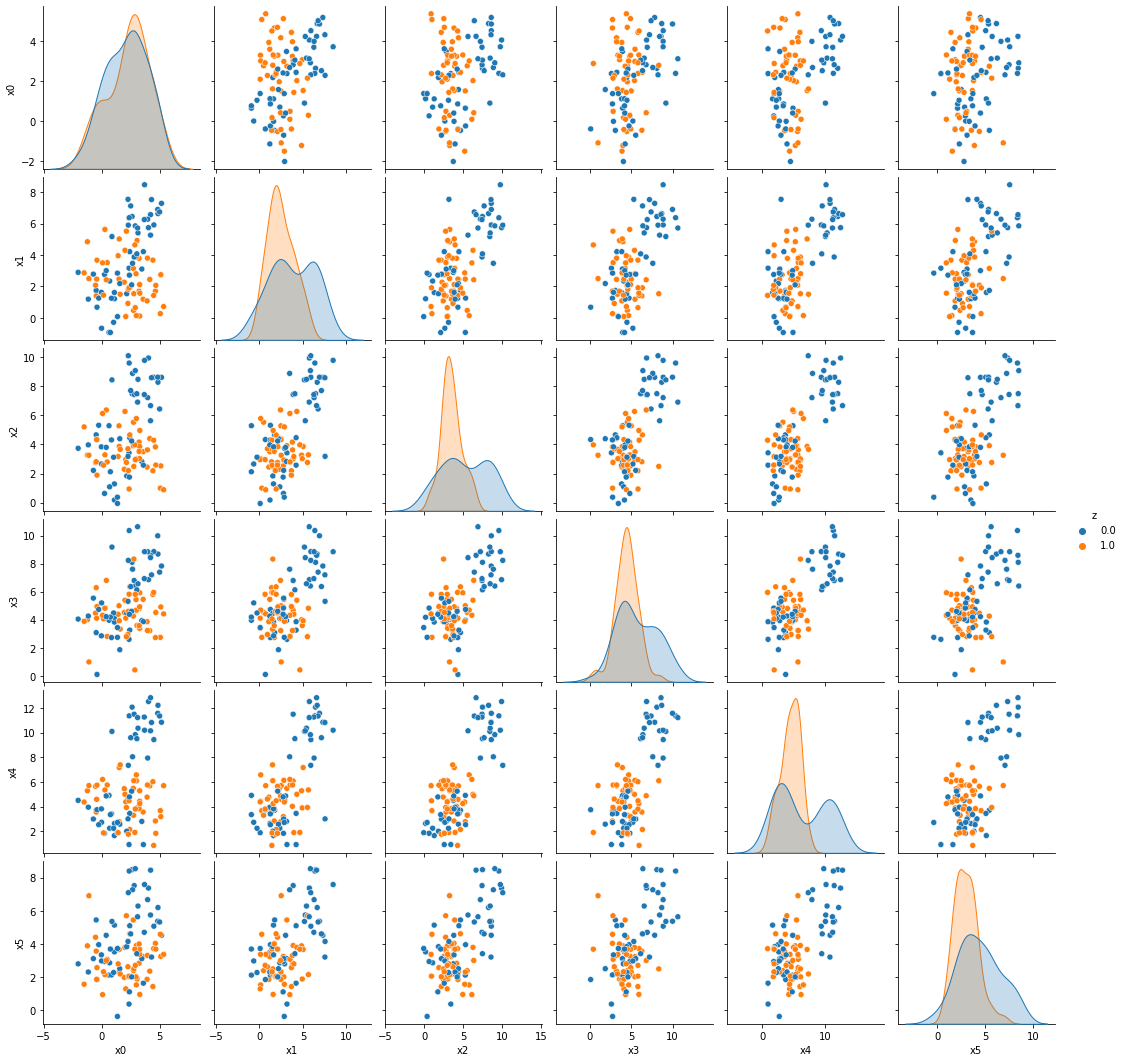

In [10]:
var_list = ['x'+ str(i) for i in range(D)]
g = sns.pairplot(pop_feature_bias_df1, vars= var_list, hue = 'z')

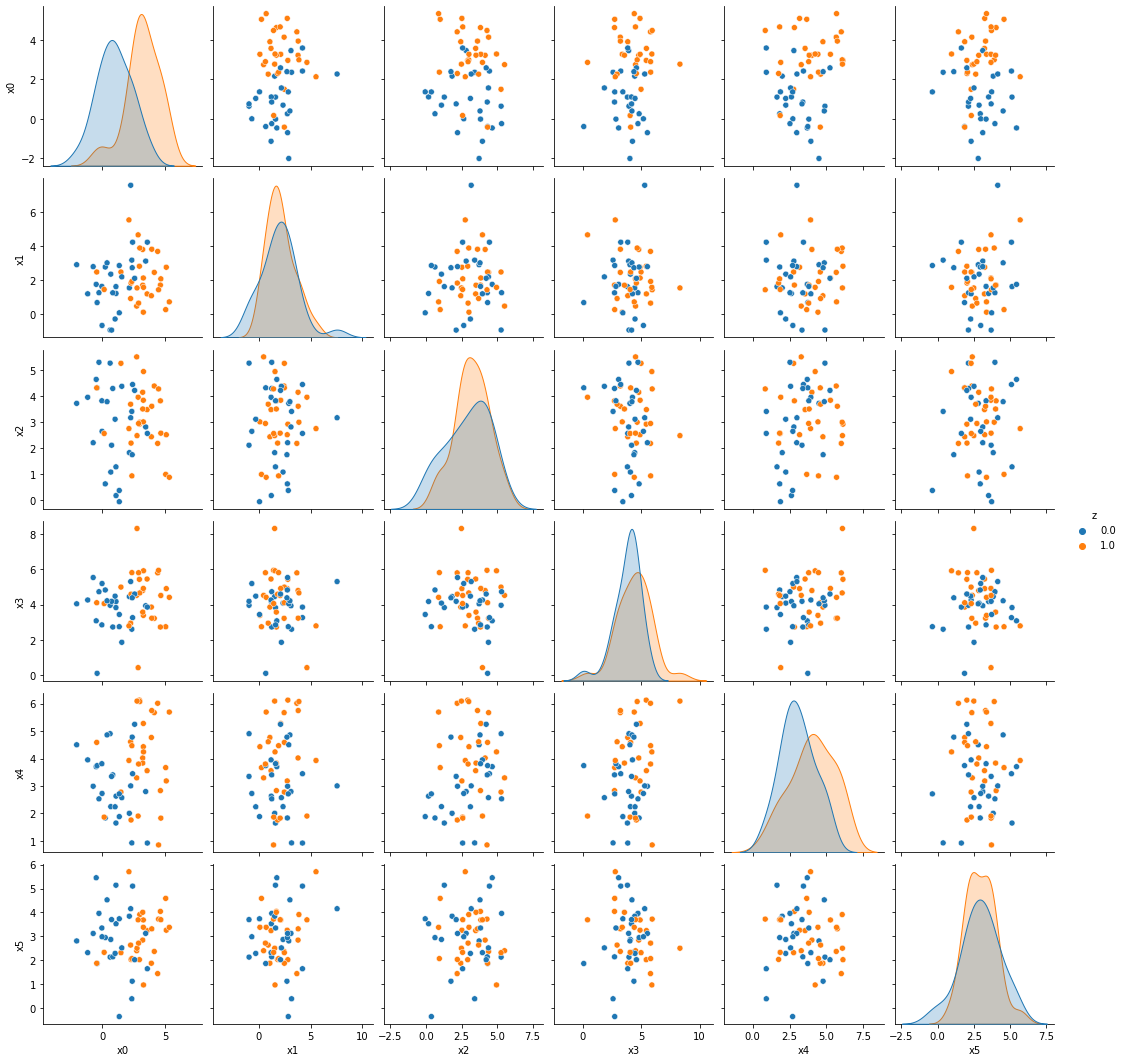

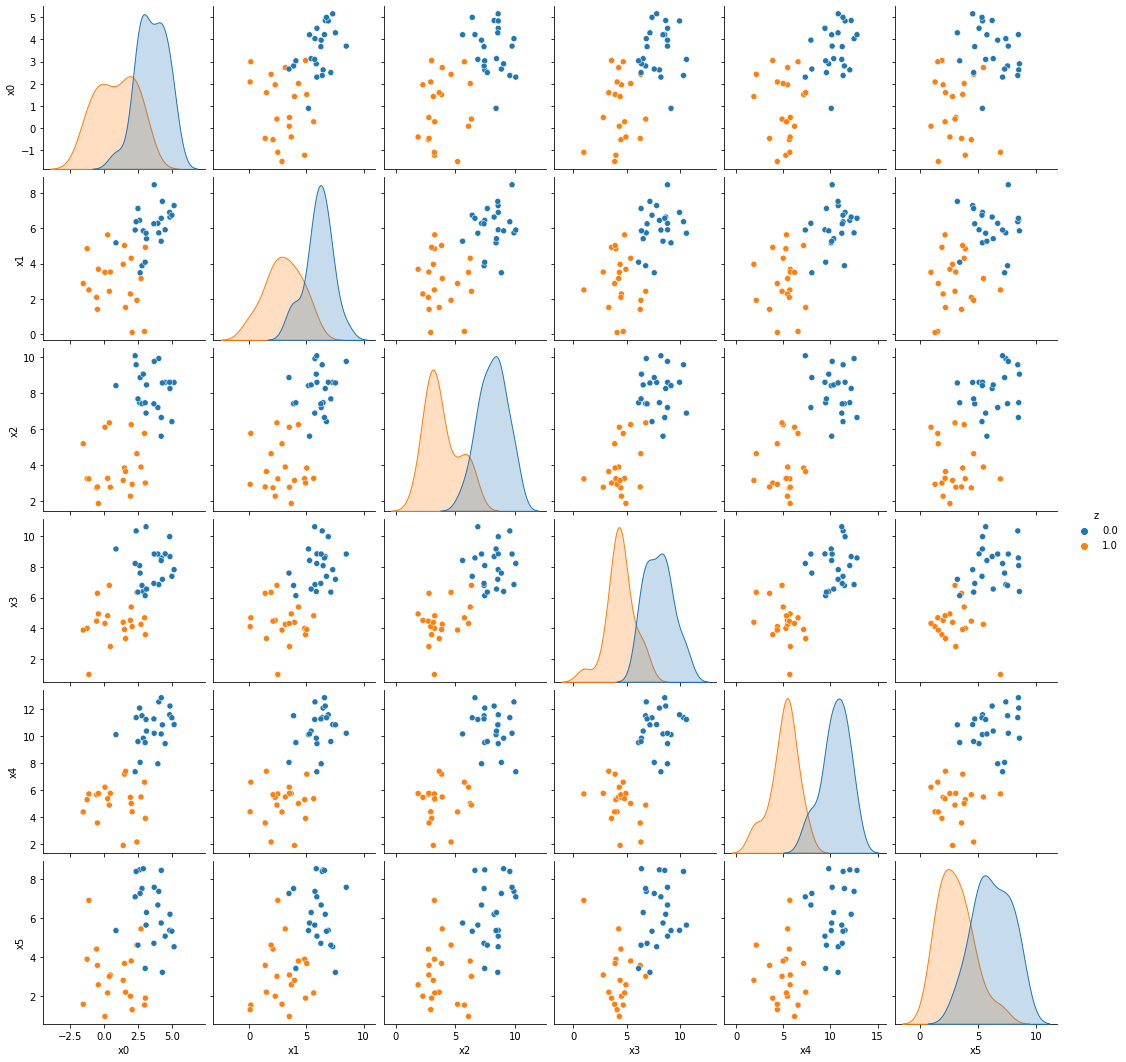

In [11]:
[sns.pairplot(dffbai, vars= var_list, hue = 'z') for ai,dffbai in pop_feature_bias_df1.groupby('a')]